### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2026-01-09 20:35:44.111327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767990944.296644      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767990944.346451      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767990944.774093      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767990944.774141      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767990944.774145      55 computation_placer.cc:177] computation placer alr

## Import Data

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [ ]:
print(data.shape, labels.shape)

In [3]:
for i in range(classes):
    path = "/kaggle/input/traffic-sign/gtsrb-german-traffic-sign"
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

NotADirectoryError: [Errno 20] Not a directory: '/kaggle/input/traffic-sign/gtsrb-german-traffic-sign'

In [9]:
import os
from PIL import Image
import numpy as np

data = []
labels = []
classes = 43

# 1. Base path usually contains a 'Train' folder in Kaggle datasets
# Check your exact path, but it usually looks like this:
base_path = "/kaggle/input/gtsrb-german-traffic-sign/Train" 

for i in range(classes):
    # 2. You must join the class number to the path (e.g., .../Train/0, .../Train/1)
    path = os.path.join(base_path, str(i))
    
    # Safety check: ensure this specific class folder exists before listing
    if not os.path.exists(path):
        print(f"Folder not found: {path}")
        continue

    images = os.listdir(path)

    for a in images:
        try:
            # 3. Use os.path.join instead of '\\' 
            # Kaggle is Linux, so '\\' (Windows style) will fail.
            image = Image.open(os.path.join(path, a))
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            print(a)
        except Exception as e:
            print(f"Error loading image: {e}")

data = np.array(data)
labels = np.array(labels)
print("Success! Data shape:", data.shape)

00000_00004_00029.png
00000_00004_00014.png
00000_00000_00006.png
00000_00000_00028.png
00000_00001_00012.png
00000_00001_00010.png
00000_00005_00015.png
00000_00005_00029.png
00000_00002_00020.png
00000_00003_00000.png
00000_00003_00006.png
00000_00005_00007.png
00000_00001_00018.png
00000_00002_00015.png
00000_00002_00014.png
00000_00003_00013.png
00000_00003_00021.png
00000_00005_00019.png
00000_00006_00006.png
00000_00001_00019.png
00000_00002_00028.png
00000_00001_00007.png
00000_00000_00023.png
00000_00005_00005.png
00000_00005_00028.png
00000_00006_00028.png
00000_00001_00028.png
00000_00005_00010.png
00000_00000_00029.png
00000_00006_00022.png
00000_00005_00018.png
00000_00002_00002.png
00000_00004_00005.png
00000_00005_00024.png
00000_00004_00019.png
00000_00004_00000.png
00000_00000_00003.png
00000_00003_00027.png
00000_00002_00022.png
00000_00002_00007.png
00000_00003_00016.png
00000_00005_00013.png
00000_00004_00002.png
00000_00004_00001.png
00000_00006_00013.png
00000_0000

### Splitting the data into Train and Test Set

In [10]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
print("Shape of train images is:", X_train.shape)
print("Shape of test images is:", X_test.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_test.shape)

Shape of train images is: (31367, 30, 30, 3)
Shape of test images is: (7842, 30, 30, 3)
Shape of labels is: (31367, 43)
Shape of labels is: (7842, 43)


## Building Model CNN

In [12]:
epochs = 10
batch_size = 32

In [13]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(43, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1767991416.453989      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


### Summary of the CNN Model

In [14]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

### Compilation of the model

In [16]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the CNN

In [17]:
cnn_history = cnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10


I0000 00:00:1767991449.348684     148 service.cc:152] XLA service 0x7ad30400d0d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767991449.348717     148 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1767991449.778154     148 cuda_dnn.cc:529] Loaded cuDNN version 91002


 49/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0398 - loss: 11.3751  

I0000 00:00:1767991453.356582     148 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3379 - loss: 3.2188 - val_accuracy: 0.9021 - val_loss: 0.3685
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8489 - loss: 0.5364 - val_accuracy: 0.9730 - val_loss: 0.1215
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9139 - loss: 0.3114 - val_accuracy: 0.9778 - val_loss: 0.0905
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9297 - loss: 0.2554 - val_accuracy: 0.9821 - val_loss: 0.0684
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9383 - loss: 0.2245 - val_accuracy: 0.9793 - val_loss: 0.0839
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9444 - loss: 0.2146 - val_accuracy: 0.9832 - val_loss: 0.0707
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9467 - loss: 0.1976 - val_accuracy: 0.9890 - val_loss: 0.0442
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9454 - loss: 0.2165 - val_accuracy: 0.9811 - val

### Display the Accuracy and Loss Plot

In [18]:
cnn_history.history

{'accuracy': [0.5537029504776001,
  0.8678866028785706,
  0.9192144870758057,
  0.9320942163467407,
  0.9376733303070068,
  0.9441132545471191,
  0.9445914626121521,
  0.9405425786972046,
  0.9493416547775269,
  0.9526253938674927],
 'loss': [1.7562516927719116,
  0.4692600667476654,
  0.29847022891044617,
  0.24928192794322968,
  0.23103691637516022,
  0.21309539675712585,
  0.21219395101070404,
  0.23562397062778473,
  0.2098308503627777,
  0.19981691241264343],
 'val_accuracy': [0.9020658135414124,
  0.9729660749435425,
  0.9778117537498474,
  0.9821473956108093,
  0.979341983795166,
  0.9831675887107849,
  0.9890334010124207,
  0.9811272621154785,
  0.9822749495506287,
  0.9881407618522644],
 'val_loss': [0.36845460534095764,
  0.12147967517375946,
  0.09048881381750107,
  0.06836200505495071,
  0.08392582833766937,
  0.07068789005279541,
  0.044196534901857376,
  0.06741742044687271,
  0.07854420691728592,
  0.049922630190849304]}

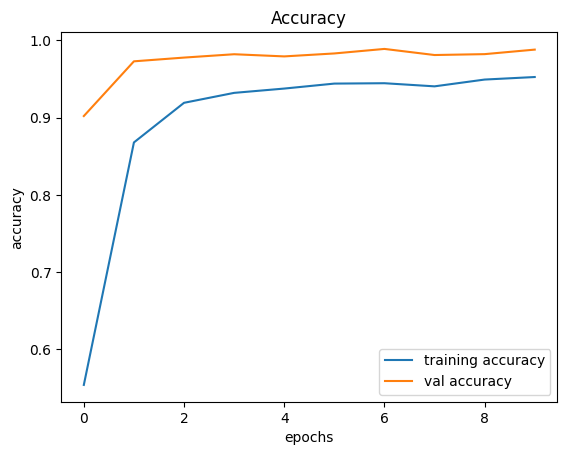

In [21]:
plt.plot(cnn_history.history['accuracy'], label='training accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

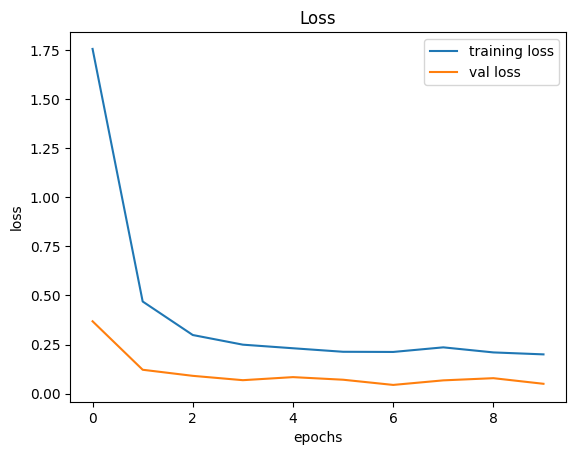

In [22]:
plt.plot(cnn_history.history['loss'], label='training loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Test our model with test dataset

In [27]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

In [34]:
for img in imgs:
    test_img_path = "/kaggle/input/gtsrb-german-traffic-sign/Test"
    img = f'{test_img_path}/{img.split("/")[-1]}'
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

In [29]:
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

## Make Prediction

In [35]:
pred = cnn_model.predict(X_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [38]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.metrics import accuracy_score
import os

# 1. Load the CSV
y_test = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

# Get the paths and the true labels
img_paths = y_test["Path"].values
true_labels = y_test["ClassId"].values

data = []
valid_labels = [] # We will store labels here only if the image loads

# Base folder for test images
test_base_path = "/kaggle/input/gtsrb-german-traffic-sign"

# 2. Loop through both paths and labels together
for img_rel_path, label in zip(img_paths, true_labels):
    try:
        # Construct full path correctly
        # The CSV path is like "Test/00000.png", so we join it with base
        full_path = os.path.join(test_base_path, img_rel_path)
        
        image = Image.open(full_path)
        image = image.resize((30,30))
        data.append(np.array(image))
        
        # ONLY append the label if the image loaded successfully
        valid_labels.append(label)
        
    except Exception as e:
        print(f"Error loading image: {img_rel_path} - {e}")

# 3. Convert to arrays
X_test = np.array(data)
y_test_final = np.array(valid_labels)

print(f"Images Loaded: {X_test.shape[0]}")
print(f"Labels Loaded: {y_test_final.shape[0]}")

# 4. Predict
# model.predict returns probabilities (e.g., [0.1, 0.8, 0.1])
pred_probs = cnn_model.predict(X_test)

# Convert probabilities to Class IDs (e.g., index 1)
pred_classes = np.argmax(pred_probs, axis=1)

# 5. Calculate Accuracy
acc = accuracy_score(y_test_final, pred_classes)
print(f"Test Accuracy: {acc}")

Images Loaded: 12630
Labels Loaded: 12630
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.9617577197149644


In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

ValueError: Found input variables with inconsistent numbers of samples: [12630, 12631]

Below is my code where i have increased accuracy from 96.17 to 98.18.
things implemented-->
1. scaling==> scaled pixels which were in range of 0-255 to 0-1.
2. batch normalization

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.1959 - loss: 3.5037 - val_accuracy: 0.2011 - val_loss: 3.0299 - learning_rate: 0.0010
Epoch 2/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5439 - loss: 1.4855 - val_accuracy: 0.8405 - val_loss: 0.5720 - learning_rate: 0.0010
Epoch 3/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7193 - loss: 0.9177 - val_accuracy: 0.9410 - val_loss: 0.2120 - learning_rate: 0.0010
Epoch 4/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8008 - loss: 0.6252 - val_accuracy: 0.9711 - val_loss: 0.1068 - learning_rate: 0.0010
Epoch 5/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8564 - loss: 0.4697 - val_accuracy: 0.9790 - val_loss: 0.0820 - learning_rate: 0.0010
Epoch 6/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8900 - loss: 0.3528 - val_accuracy: 0.9778 - val_loss: 0.0758 - learning_rate: 0.0010
Epoch 7/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9097 - loss: 0

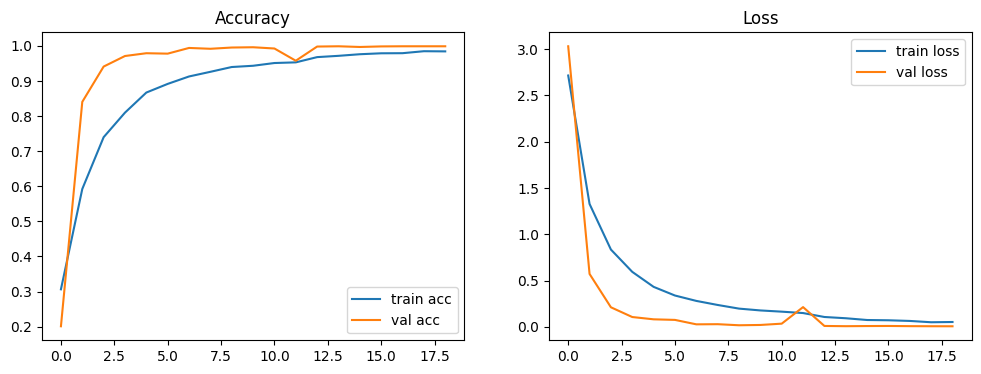

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

data = np.array(data, dtype=np.float32)
labels = np.array(labels)


# --- 1. Split & Normalize (CRITICAL STEP) ---
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Neural Networks work best with values between 0-1, not 0-255.
# This single line often boosts accuracy by 1-2%.
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# --- 2. Data Augmentation ---
# This creates "fake" variations (zoomed, rotated) of signs during training.
# It forces the model to learn the SHAPE, not just the pixels.
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,  # Don't flip! A left arrow becomes a right arrow.
    vertical_flip=False
)
datagen.fit(X_train)

# --- 3. Build Model with Batch Normalization ---
model = Sequential()

# Block 1
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization()) # Stabilizes learning
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Block 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Block 3 (Dense)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# --- 4. Callbacks for Smarter Training ---
# If accuracy gets stuck, lower the learning rate to find the "sweet spot"
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train with augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=25, 
                    validation_data=(X_test, y_test),
                    callbacks=[lr_reduction, early_stop])

# --- 5. Evaluation ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

# --- 6. Prediction on Test CSV (Updated logic) ---
# Note: model.predict_classes is deprecated in new TensorFlow versions
# Use np.argmax(model.predict(x), axis=-1) instead